<font size=6><center><strong>DEFAULT DES CARTES DE CRÉDITS BANCAIRES</strong></center></font>

<font size=5><u><strong>**SOMMAIRE DE VISUALISATION:**</strong></u></font><br>
* [Information concernant notre dataset](#info)
* [Description du jeu de données](#describe)
* [Visualisation du jeu de données](#vs)

 ## <font color="blue" size=5 id='info'>**Information concernant notre dataset**</font>

Le jeu de données à notre disposition nous permet de prédire les défaults des cartes de crédits. Nous avons des données stockées et à partir de ces données on doit pouvoir en extraire les différents comportements et evaluer le taux de probabilités. 

Notre dataset est un jeu de données qui possède les informations sur les defaults de paiements, sexe, statut matrimonial, niveau d'éducation, ses différentes factures et paiements à Taïwan d'Avril 2005 à Septembre 2005.

Les différentes observations sont:


* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 0,4,5,6=others)
* MARRIAGE: Marital status (1=married, 2=single, 3=divorce, 0=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-2=no consumption, -1=paid in full, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



Le nom de notre jeu de données est: <strong><i>default of credit card clients.xls</i></strong>. Nous devons à partir de ce fichier entrainer différents modéles pour nous aider à prédire les différents comportements des clients pour éviter et anticiper un default bancaire. Nous allons également utiliser <strong><i>des modéles de diagnostic, Descriptif et Prédictif.</i></strong> On va tout d'abord décrire notre jeu de données pour comprendre les différentes variables ainsi que les repartitions.

In [1]:
#Cette zone sera réservée aux bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#On importe notre dataset ici. La colonne ID n'a pas été prise car elle ne fourni aucune information concréte

data = pd.read_excel(r'default of credit card clients.xls',index_col=0, header=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


 ## <font color="blue" size=5 id='describe'>**Description du jeu de données**</font>

In [3]:
#On fait une copie du dataset original dans une autre variable pour des soucis de professionalisme et de sécurité
df=data.copy()
df.shape

(30000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Le dataset possède uniquement des valeurs quantitative

<AxesSubplot:title={'center':'Carte des Valeurs Manquantes'}, ylabel='ID'>

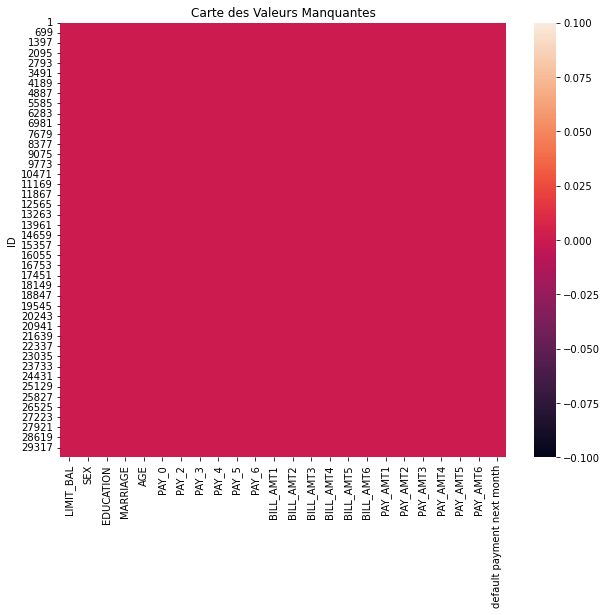

In [5]:
#Vérification des valeurs manquantes
plt.figure(figsize=(10,8))
plt.title("Carte des Valeurs Manquantes")
sns.heatmap(df.isna())

Le dataset ne possède pas de valeurs manquantes

In [6]:
#Observation globale de notre jeu de données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


 ## <font color="blue" size=5 id='vs'>**Visualisation du jeu de données**</font>

In [7]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'Default'}, inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [8]:
#On va diviser le dataset pour une meilleure observation
df_cat=df.iloc[:,1:5]
df_pay=df.iloc[:,5:11]
df_bill=df.iloc[:,11:17]
df_pay_amt=df.iloc[:,17:23]

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

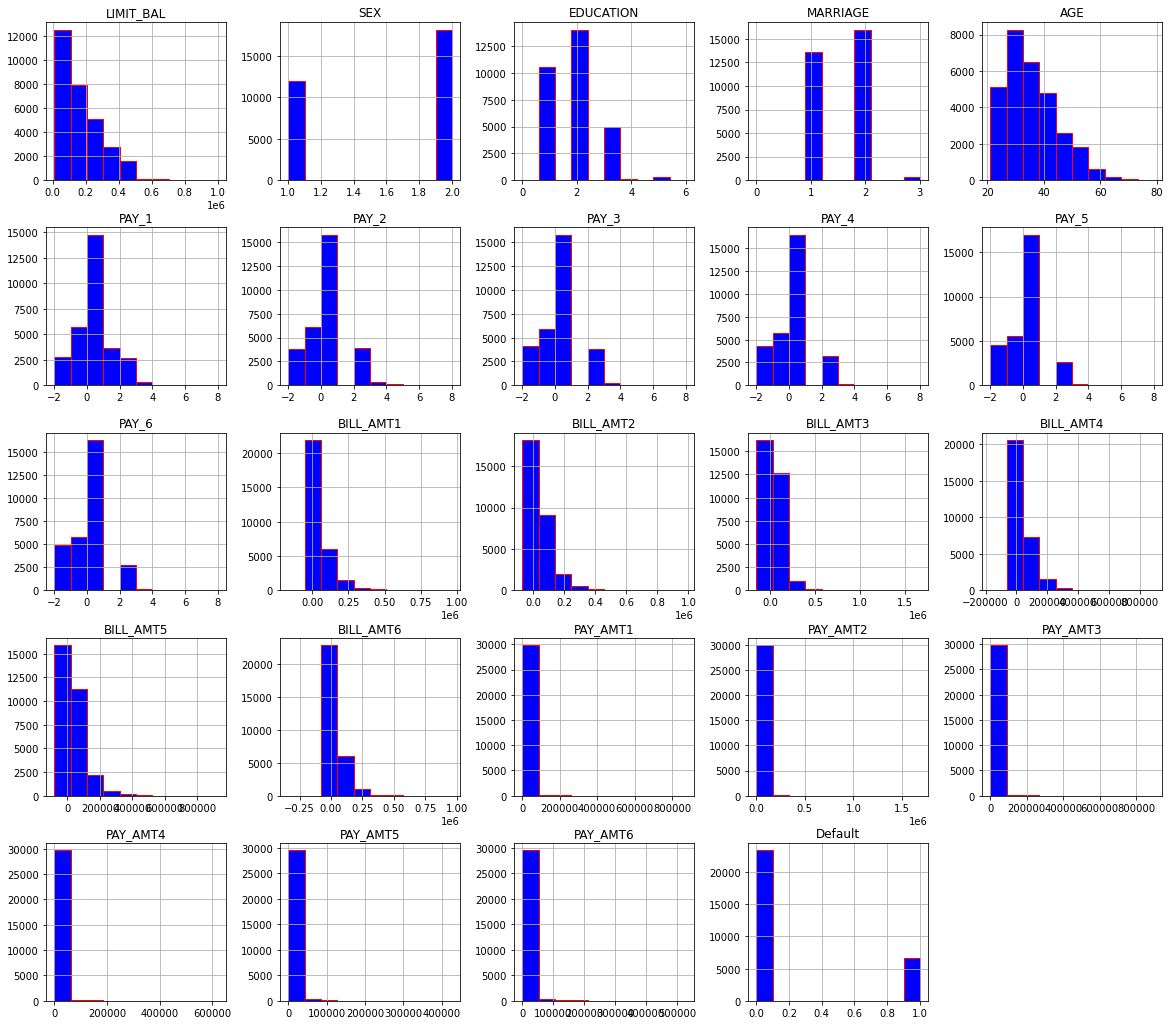

In [9]:
df.hist(bins=10, grid=True,figsize=(20,18), color="blue", edgecolor="red")

Nous constatons que la variable cible est <strong>Default</strong>. Nous allons analyser cette variable

In [10]:
df['Default'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default, dtype: float64

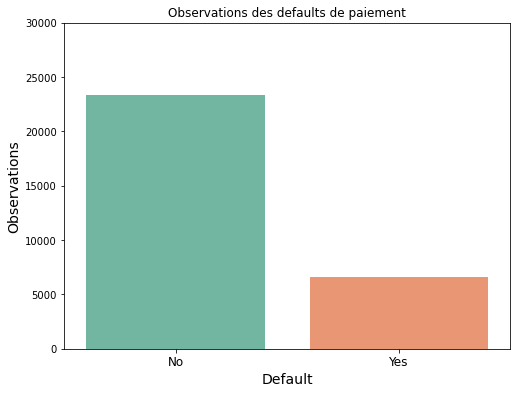

In [11]:
plt.figure(figsize=(8,6))
plt.title("Observations des defaults de paiement")

ax = sns.countplot(x="Default", data=df, palette="Set2")

plt.xlabel("Default", fontsize= 14)
plt.ylabel("Observations", fontsize= 14)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 12)
    
plt.show()

<strong>Default après visualisation, possède 2 valeurs unique(0 et 1). 0 est pour Non et 1 est pour Oui. Nous rencontrons dans le dataset 77.88% de "Pas de default" et 22.12% de "Default"</strong>

## Variable Categorique[SEXE, EDUCATION, MARRIAGE, AGE et PAY]

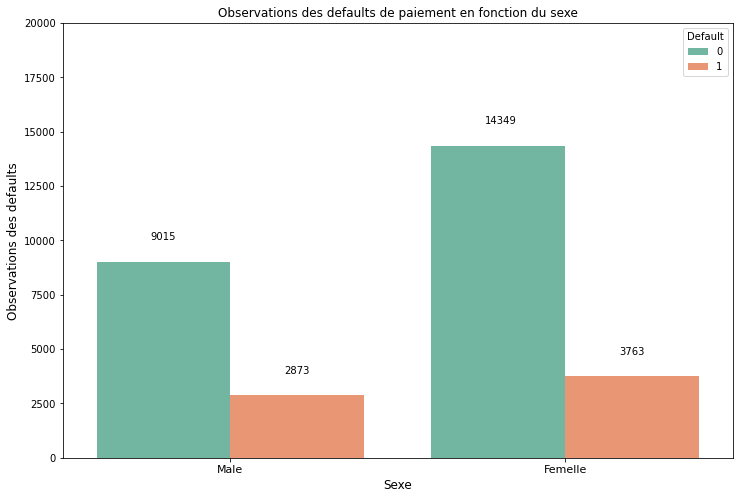

In [12]:
#Variable Categorique[SEXE, EDUCATION, MARRIAGE, AGE et PAY]
#On commence par le sexe

plt.figure(figsize=(12,8))
plt.title("Observations des defaults de paiement en fonction du sexe")

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'Set2')

plt.xlabel("Sexe", fontsize= 12)
plt.ylabel("Observations des defaults", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Femelle'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

Nous observons que du côté des hommes donc 11888 observations, il y'a 2873 defaults et du côté des femmes, nous avons 3763 observations de defaults sur 18112. Le ratio des defaults de paiements est donc plus important chez les hommes que les femmes. 20,77%(Femelle) contre 24,16%(Male) 

In [13]:
#On passe à EDUCATION
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [14]:
df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [15]:
#Nous avons 4 classes pour EDUCATION

df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 0 if x==0 or x==4 or x==5 or x==6 else x)
df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
0    0.015600
Name: EDUCATION, dtype: float64

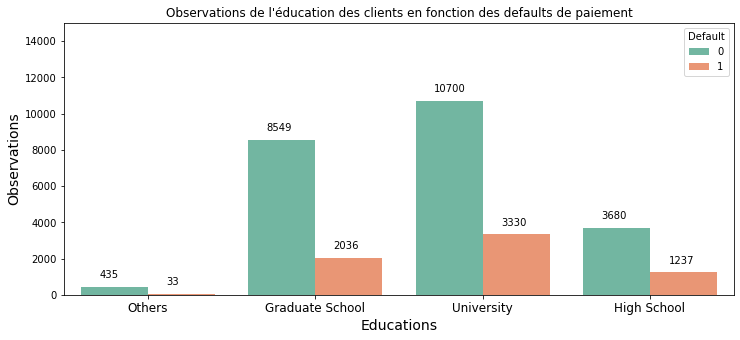

In [16]:
plt.figure(figsize=(12,5))
plt.title("Observations de l'éducation des clients en fonction des defaults de paiement")

ax = sns.countplot(x="EDUCATION", hue="Default", data=df, palette="Set2")

plt.xlabel("Educations", fontsize= 14)
plt.ylabel("Observations", fontsize= 14)
plt.ylim(0,15000)
plt.xticks([0,1,2,3], ['Others', 'Graduate School', 'University', 'High School'], fontsize = 12)    
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [17]:
print("Taux de Probabilité des defaults par niveau d'éducation")
print("=======================================================")
print("Others:", 33/435*100,"%")
print("Graduate School:", 2036/8549*100,"%")
print("University:", 3330/10700*100,"%")
print("High School:", 1237/3680*100,"%")

Taux de Probabilité des defaults par niveau d'éducation
Others: 7.586206896551724 %
Graduate School: 23.815650953327875 %
University: 31.121495327102807 %
High School: 33.61413043478261 %


In [18]:
#Passons à la variable MARRIAGE
df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

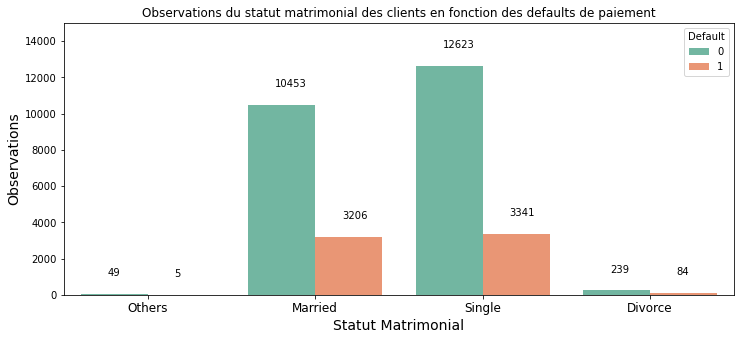

In [19]:
plt.figure(figsize=(12,5))
plt.title("Observations du statut matrimonial des clients en fonction des defaults de paiement")

ax = sns.countplot(x="MARRIAGE", hue="Default", data=df, palette="Set2")

plt.xlabel("Statut Matrimonial", fontsize= 14)
plt.ylabel("Observations", fontsize= 14)
plt.ylim(0,15000)
plt.xticks([0,1,2,3], ['Others', 'Married', 'Single', 'Divorce'], fontsize = 12)    
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.show()

In [20]:
print("Taux de Probabilité des defaults en se basant sur le statut matrimonial")
print("=======================================================================")
print("Others:", 5/49*100,"%")
print("Married:", 3206/10453*100,"%")
print("Single:", 3341/12623*100,"%")
print("Divorce:", 84/239*100,"%")

Taux de Probabilité des defaults en se basant sur le statut matrimonial
Others: 10.204081632653061 %
Married: 30.670620874390124 %
Single: 26.46755921730175 %
Divorce: 35.146443514644346 %


In [21]:
#AGE
df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

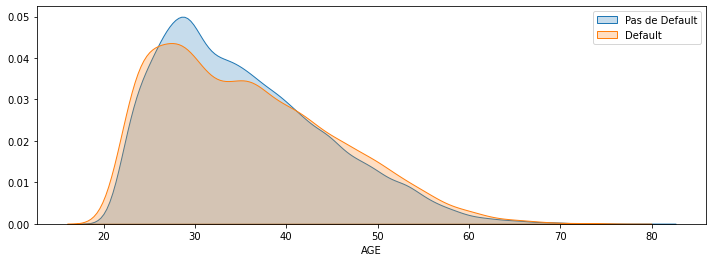

In [23]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'Pas de Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

In [24]:
df.PAY_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

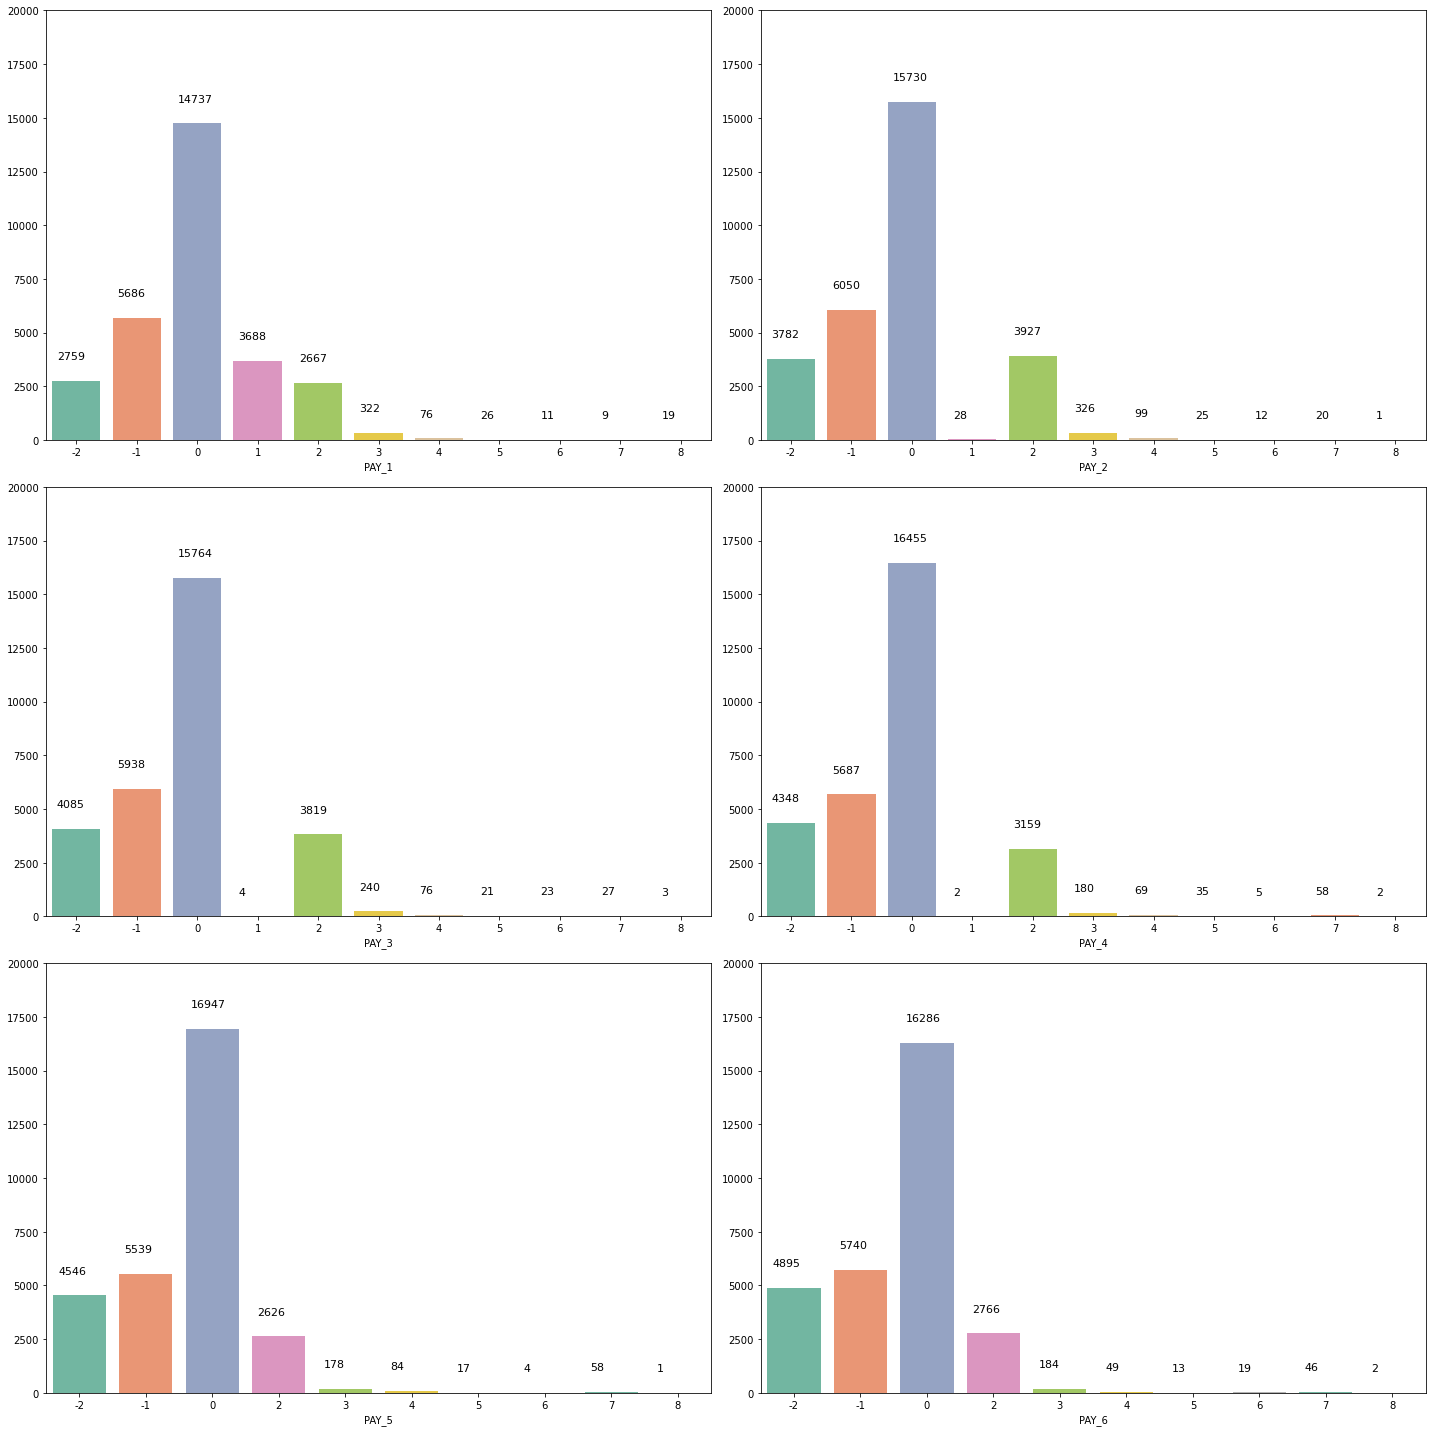

In [25]:
#pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(20,20))
#list = ['No consumption', 'Paid in full', 'The use of revolving credit', 'Payment delay for one month', 'Payment delay for two months', 'Payment delay for three months', 'Payment delay for four months', 'Payment delay for five months', 'Payment delay for six months', 'Payment delay for seven month','payment delay for eight months']

for i,col in enumerate(df_pay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(x = df.loc[:,col], palette = 'Set2')
    plt.ylim(0,20000)
    plt.ylabel('')
    #for l in range(0,11):
        #x=0.6
        #y=0.6
        #plt.text(x, y, list[l], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        #x=x-0.1
        #y=y-0.2
    #plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8], ['No consumption', 'Paid in full', 'The use of revolving credit', 'Payment delay for one month', 'Payment delay for two months', 'Payment delay for three months', 'Payment delay for four months', 'Payment delay for five months', 'Payment delay for six months', 'Payment delay for seven month','payment delay for eight months'], fontsize = 12) 
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+1000), fontsize = 11)

plt.show()

In [26]:
list = ['No consumption', 'Paid in full', 'The use of revolving credit', 'Payment delay for one month', 'Payment delay for two months', 'Payment delay for three months', 'Payment delay for four months', 'Payment delay for five months', 'Payment delay for six months', 'Payment delay for seven month','payment delay for eight months']
print("Statut de paiement:")
print("------------------------")
for i in range(0,11):
    print(list[i])

Statut de paiement:
------------------------
No consumption
Paid in full
The use of revolving credit
Payment delay for one month
Payment delay for two months
Payment delay for three months
Payment delay for four months
Payment delay for five months
Payment delay for six months
Payment delay for seven month
payment delay for eight months


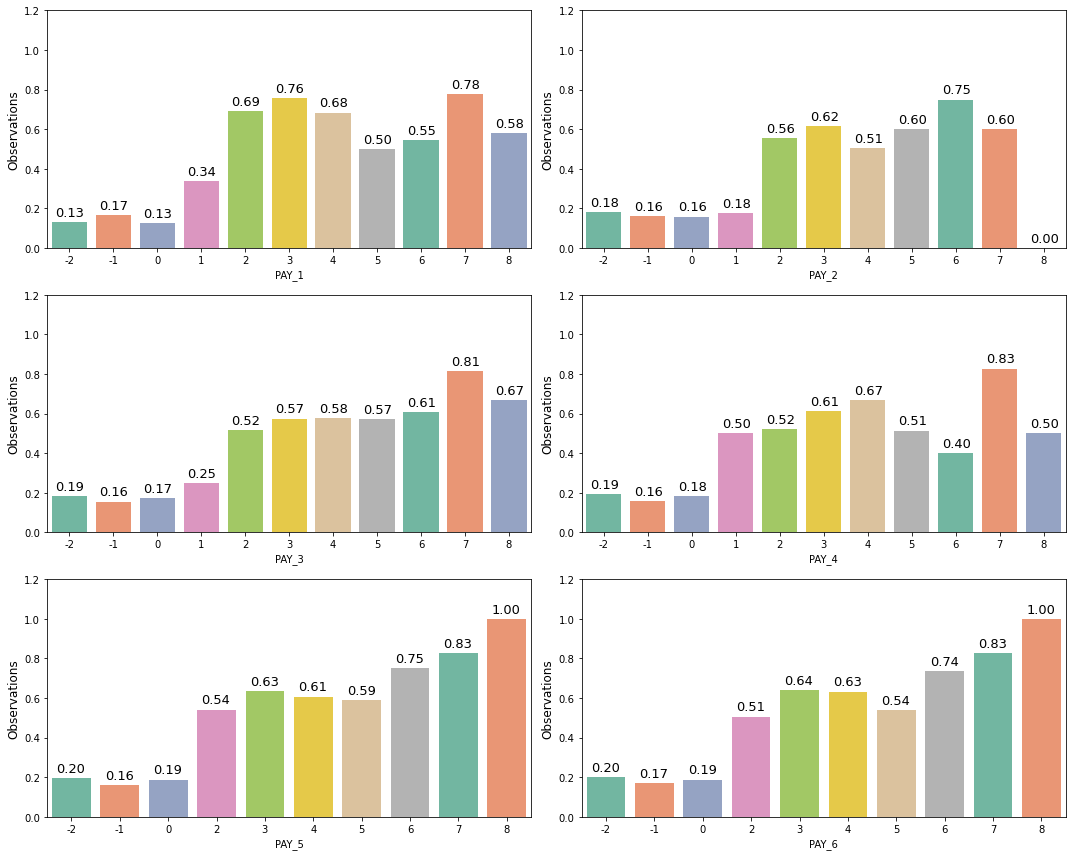

In [27]:
plt.figure(figsize=(15,12))
plt.title("Observations des paiements en fonction du default des cartes")

for i,col in enumerate(df_pay):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = df, palette = 'Set2', ci = None)
    plt.ylabel("Observations", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

On a terminé l'analyse et la visualisation des données des variables categoriques

## Variable quantitative

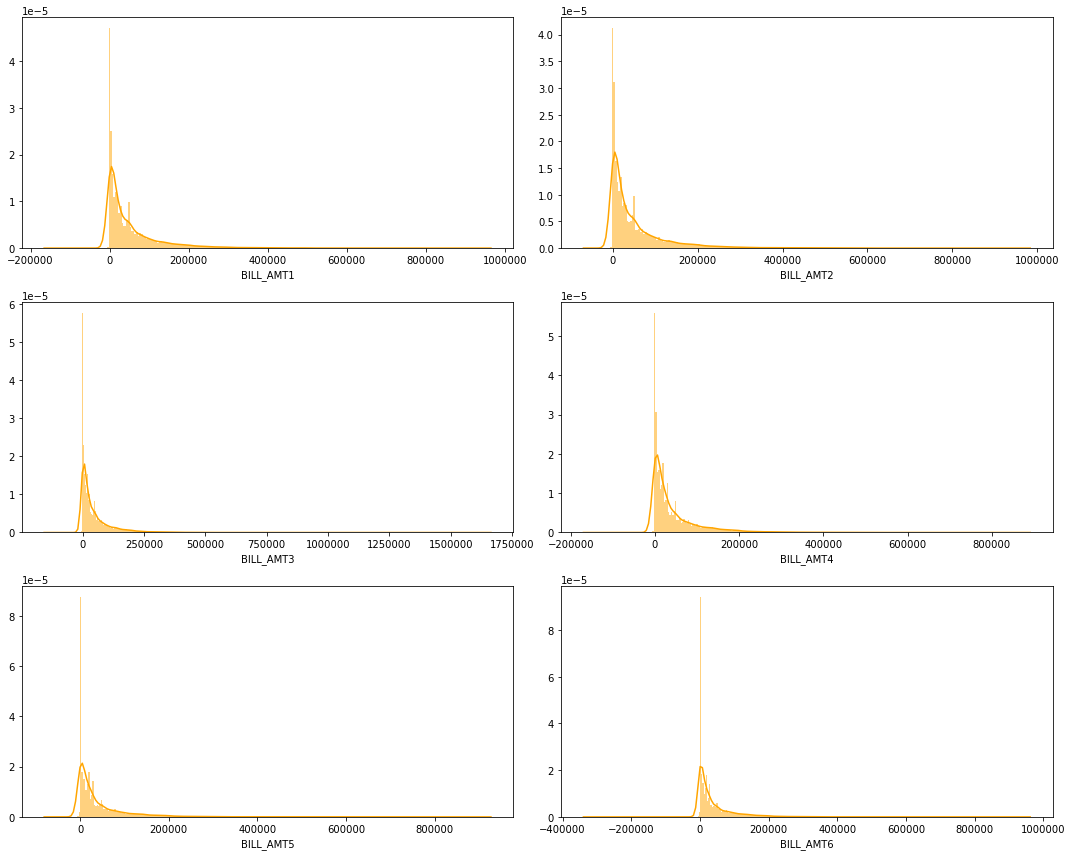

In [28]:
#BILL_AMT

plt.figure(figsize=(15,12))

for i,col in enumerate(df_bill):    
    plt.subplot(3,2,i + 1)
    sns.histplot(df.loc[:,col], kde=True, stat="density", linewidth=0, color="orange")
    plt.ticklabel_format(style='plain', axis='x')    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

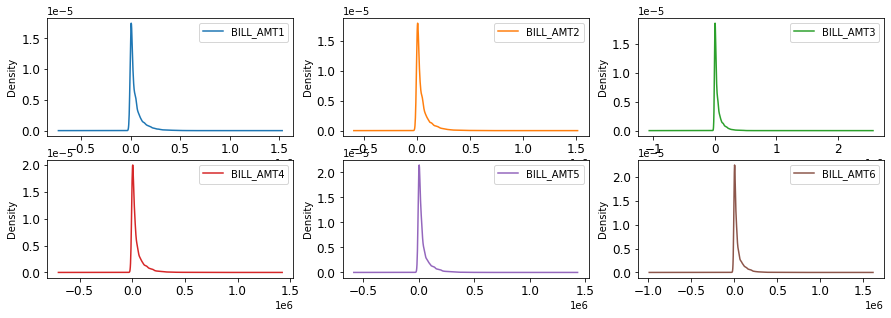

In [29]:
plt = df_bill.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

In [31]:
#PAY_AMT
plt.figure(figsize=(15,10))
for i,col in enumerate(df_pay_amt):    
    plt.subplot(3,2,i + 1)
    sns.histplot(df.loc[:,col], kde=True, stat="density", linewidth=0)
    plt.ticklabel_format(style='plain', axis='x') 
    plt.ylim(0,0.0004)
    plt.ylabel('')
    plt.tight_layout()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'figure'

In [33]:
df.PAY_AMT1.unique()

array([    0,  1518,  2000, ..., 10029,  9054, 85900])

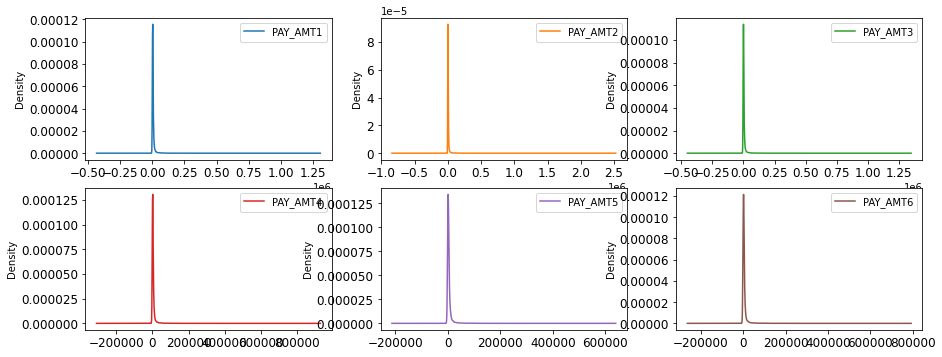

In [34]:
plt = df_pay_amt.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,12))

In [35]:
lim_val = df.iloc[:,0]
lim_val

ID
1         20000
2        120000
3         90000
4         50000
5         50000
          ...  
29996    220000
29997    150000
29998     30000
29999     80000
30000     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64

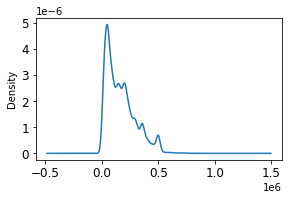

In [36]:
plt = lim_val.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,12))

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

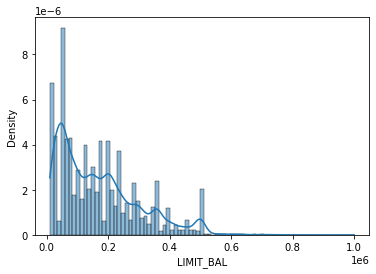

In [40]:
sns.histplot(lim_val, kde=True, stat="density")

In [37]:
df['LIMIT_BAL'].value_counts(normalize=True)

50000      0.112167
20000      0.065867
30000      0.053667
80000      0.052233
200000     0.050933
             ...   
730000     0.000067
1000000    0.000033
327680     0.000033
760000     0.000033
690000     0.000033
Name: LIMIT_BAL, Length: 81, dtype: float64